# Kernel SVM (Support Vector Machine)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
display(dataset.head(10))

# Define independent variables X and dependent variable y
# X = Age and EstimatedSalary, y = Purchased (0 = No, 1 = Yes)

X_df = dataset.iloc[:, 2:4] # every rows, every numerical columns except last
display(X_df.head(10))

y_df = dataset.iloc[:, 4:5] # every rows, only last column
display(y_df.head(10))

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


,Purchased
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


## Splitting the dataset into the Training set and Test set

Training Dataset: The sample of data used to fit the model.
The actual dataset that we use to train the model (weights and biases in the case of Neural Network). 
The model sees and learns from this data.

Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
provides the gold standard used to evaluate the model.
only used once a model is completely trained
contains carefully sampled data that spans the various classes that the model would face, when used in the real world.

Split dataset into training set (X_train, y_train) and test set (X_test, y_test), 
test_size = proportion of the dataset to include in the test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # 25% in test set

## Feature Scaling

some algorithms requires features to be normalized as important to have values on same scale for acurate results

Obviously age and estimated salary features  have different units, one in years, the other in $

Standardization involves rescaling the features such that 

-->they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one## 

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting Kernel SVM to the training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predicting the test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(y_test, y_pred)

print(cm)

#accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[1,0]))* 100

accuracy = accuracy_score(y_test, y_pred) *100

# \n = begin new paragraph

print('\nThe Model is {0}% accurate'.format(round(accuracy, 2)))

[[52  7]
 [ 3 38]]

The Model is 90.0% accurate


##  Visualising the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


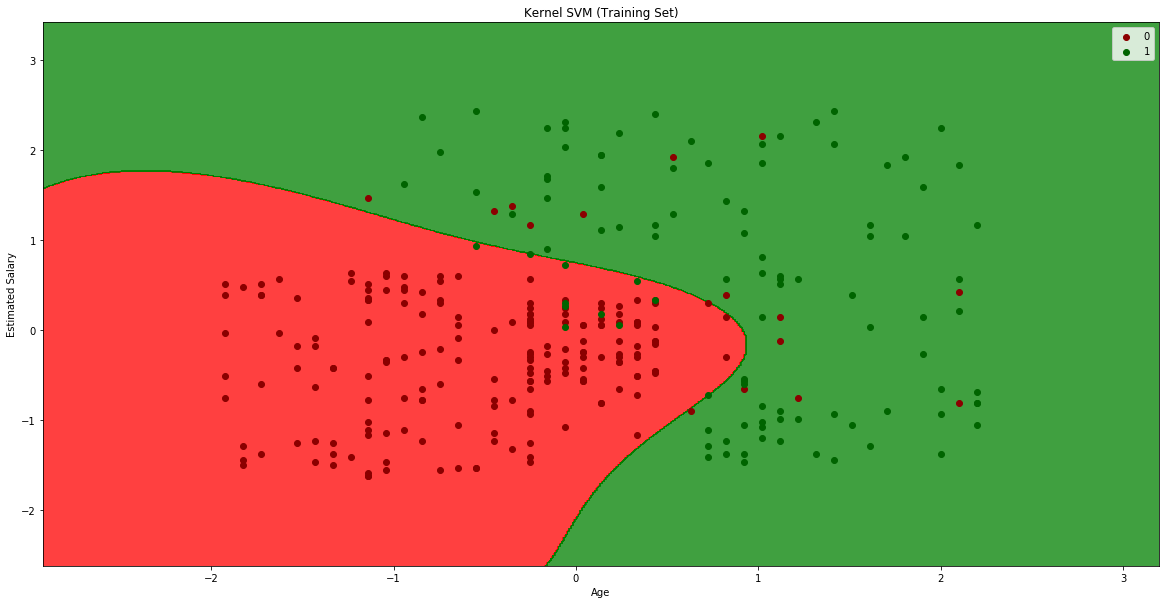

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Visualising the Training Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(20,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Kernel SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


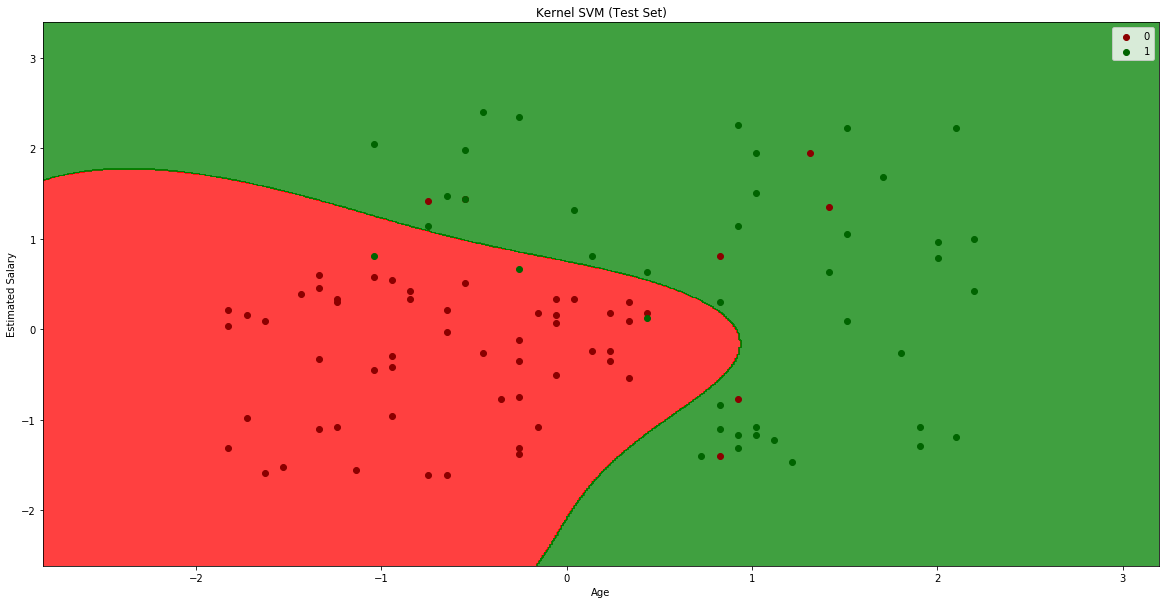

In [9]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(20,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)
plt.title('Kernel SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.
Introduce Kernel functions for sequence data, graphs, text, images, as well as vectors. The most used type of kernel function is RBF. Because it has localized and finite response along the entire x-axis.
The kernel functions return the inner product between two points in a suitable feature space. Thus by defining a notion of similarity, with little computational cost even in very high-dimensional spaces.